## Problem Set #4
## Discrete approximation of an AR(1) process
### Xi Chen

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy.linalg as LA

## Part (a) 

In [2]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [3]:
mu= 11.4
r = 0.85
z = np.zeros(500)

In [4]:
for i in range(500):
    if i == 0:
        z[i] = r*unif_vec[0] + (1-r)*mu + eps_vec[i]
    else:
        z[i] = r*z[i-1] + (1-r)*mu + eps_vec[i]

In [12]:
z[:100]

array([  3.23849021,   4.60812198,   5.2164978 ,   5.51887776,
         6.24374493,   6.18543692,   7.30476859,   7.80913311,
         8.44675432,   8.65202383,   8.89116037,   8.42012593,
         8.77389048,   9.31889733,   8.94063031,   9.34590613,
         9.33842967,  10.01310826,   9.98214958,  10.88059339,
        10.92575602,  11.02585647,  10.8737385 ,  12.92131757,
        12.71811919,  12.62439986,  11.16738531,  11.61012107,
        11.43907413,  11.32209193,  10.92932058,  11.89810392,
        12.13057829,  11.94375158,  11.47441936,  11.50859111,
        11.59663594,  12.02894585,  12.59795921,  13.06894091,
        11.8213986 ,  12.01822875,  11.57692535,  11.59296933,
        12.77429957,  13.4019536 ,  12.72535125,  12.54826745,
        11.43187522,  11.68122987,  10.85853018,  11.44887645,
        10.44241322,  10.28012835,  10.77520778,  10.88509369,
        11.24180585,  11.44672244,  11.84573871,  11.62898043,
        11.4110171 ,  12.06395449,  12.35695971,  11.30

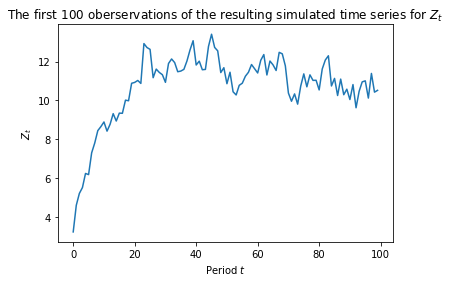

In [6]:
plt.plot(z[:100])
plt.title("The first 100 oberservations of the resulting simulated time series for $Z_t$")
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.show()

## Part (b) 

In [7]:
z_vals = np.linspace(mu-3*sigma, mu+3*sigma, 5)

In [8]:
z_vals[2]

11.4

In [9]:
print('z_vals is', z_vals)

z_vals is [  9.3   10.35  11.4   12.45  13.5 ]


## Part (c) 

In [10]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

In [11]:
print('z_cuts is', z_cuts)

z_cuts is [  9.825  10.875  11.925  12.975]


In [14]:
z_bins = np.digitize(z, z_cuts)
z_bins

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 4, 2, 3, 2, 2, 3, 4,
       3, 3, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 3, 3, 1, 2, 1, 2, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 2, 3,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 2, 4, 3, 3, 3, 2, 3,
       4, 4, 3, 4, 4, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 3, 3, 1, 1, 2, 2,
       3, 3, 3, 3, 2, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2,
       2, 4, 3, 4, 3, 3, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 3, 3, 3, 4, 4, 3, 3, 2, 1,
       2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 2,
       2, 2,

In [36]:
P_hat = np.zeros(shape=(5,5))

for i in range(0,5):
    for j in range(0,5):
        count = 0
        denom = 0
        for k in range(0,499):
            curr = z_bins[k]
            nxt = z_bins[k+1]
            if curr == i and nxt == j:
                count += 1
            if curr == i:
                denom += 1
        P_hat[i][j] = count/denom

print("Markov transition matrix P is: \n", P_hat)

Markov transition matrix P is: 
 [[ 0.75757576  0.21212121  0.03030303  0.          0.        ]
 [ 0.1         0.50909091  0.34545455  0.04545455  0.        ]
 [ 0.03144654  0.22012579  0.48427673  0.2327044   0.03144654]
 [ 0.          0.04273504  0.34188034  0.5042735   0.11111111]
 [ 0.          0.          0.04255319  0.34042553  0.61702128]]


## Part (d) 

In [16]:
initial_vec = np.array([0, 0, 1, 0, 0]).reshape(5,1)
con_prob = LA.matrix_power(P_hat.T, 3) @ initial_vec
print("The probablity is ", con_prob[4])

The probablity is  [ 0.07752374]


## Part (e) 

In [18]:
eigvals, eigvecmat = LA.eig(P_hat.T)

In [19]:
eigvals

array([ 0.11107399,  1.        ,  0.36137544,  0.79405964,  0.60572911])

In [20]:
eigvecmat

array([[-0.0232403 ,  0.27491649,  0.15517844,  0.70799899,  0.41056991],
       [ 0.3979737 ,  0.45819415, -0.67034374,  0.31439168, -0.43202375],
       [-0.78776471,  0.66229881,  0.17657357, -0.17835405, -0.60869305],
       [ 0.46652157,  0.48735196,  0.63730148, -0.49910986,  0.12047379],
       [-0.05349027,  0.19577386, -0.29870975, -0.34492677,  0.5096731 ]])

In [29]:
eigvec = eigvecmat[:, 1] / eigvecmat[:, 1].sum()
stat_dist = eigvec
print("The stationary (long-run, ergodic) distribution of Z \n \
      (which is the eigenvector with the eigenvalue of 1) is: \n", stat_dist)

The stationary (long-run, ergodic) distribution of Z 
       (which is the eigenvector with the eigenvalue of 1) is: 
 [ 0.13226453  0.22044088  0.31863727  0.23446894  0.09418838]


## Part (f) 

In [30]:
z0 = z_vals[2]
x_vec = np.zeros(T)
x_t = z0
xt_ind = 1

In [31]:
for t_ind in range(T):
    xtp1_ind = np.argwhere(unif_vec[t_ind] <= np.cumsum(P_hat[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    x_t = x_tp1
    xt_ind = xtp1_ind

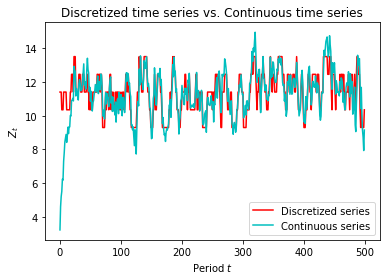

In [38]:
plt.plot(x_vec, color = 'r')
plt.plot(z, color = 'c')
plt.title('Discretized time series vs. Continuous time series')
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Discretized series', 'Continuous series'])
plt.show() 